In [1]:
# pandas data reader library
# Install pandas data reader
#!pip install pandas-datareader
# Some datatset needs API key create account and get it. Works also with non api key.

In [2]:
import pandas_datareader.data as pdr
import pandas as pd
from datetime import datetime

In [3]:
df_stooq = pdr.DataReader('^DJI', 'stooq')
df_stooq.head(10)

,Open,High,Low,Close,Volume
Date,,,,,
2023-07-03,34369.78,34465.60,34286.54,34418.47,157860059.0
2023-06-30,34269.92,34467.35,34269.92,34407.60,354767016.0
2023-06-29,33854.57,34147.68,33828.63,34122.42,284108537.0
2023-06-28,33881.38,33903.76,33755.92,33852.66,269788456.0
2023-06-27,33739.03,33975.65,33730.39,33926.74,297046041.0
2023-06-26,33730.79,33819.49,33610.32,33714.71,267948755.0
2023-06-23,33835.66,33835.66,33646.49,33727.43,383114857.0
2023-06-22,33900.47,34003.56,33835.39,33946.71,279602775.0
2023-06-21,33990.56,34097.93,33876.17,33951.52,328901783.0


<Axes: xlabel='Date'>

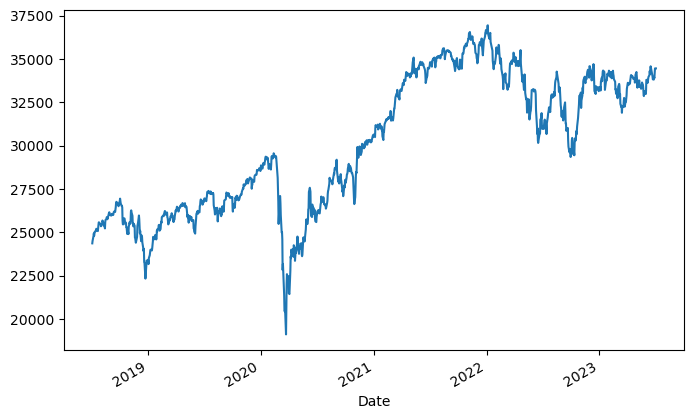

In [4]:
df_stooq['High'].plot(figsize=(8,5))

In [5]:
# Time resampling

In [6]:
df_stooq.head()

,Open,High,Low,Close,Volume
Date,,,,,
2023-07-03,34369.78,34465.60,34286.54,34418.47,157860059.0
2023-06-30,34269.92,34467.35,34269.92,34407.60,354767016.0
2023-06-29,33854.57,34147.68,33828.63,34122.42,284108537.0
2023-06-28,33881.38,33903.76,33755.92,33852.66,269788456.0
2023-06-27,33739.03,33975.65,33730.39,33926.74,297046041.0


Date
2018-12-31    Axes(0.125,0.2;0.775x0.68)
2019-12-31    Axes(0.125,0.2;0.775x0.68)
2020-12-31    Axes(0.125,0.2;0.775x0.68)
2021-12-31    Axes(0.125,0.2;0.775x0.68)
2022-12-31    Axes(0.125,0.2;0.775x0.68)
2023-12-31    Axes(0.125,0.2;0.775x0.68)
Freq: A-DEC, Name: Open, dtype: object

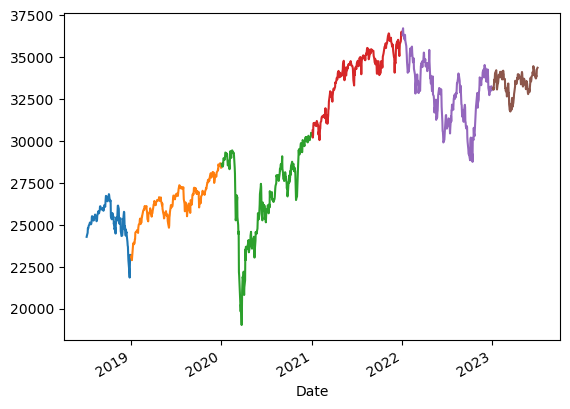

In [7]:
# Rule A means that Yearly frequency
df_stooq.resample(rule='a')['Open'].plot()

Date
2018-07-01    Axes(0.125,0.2;0.775x0.68)
2018-10-01    Axes(0.125,0.2;0.775x0.68)
2019-01-01    Axes(0.125,0.2;0.775x0.68)
2019-04-01    Axes(0.125,0.2;0.775x0.68)
2019-07-01    Axes(0.125,0.2;0.775x0.68)
2019-10-01    Axes(0.125,0.2;0.775x0.68)
2020-01-01    Axes(0.125,0.2;0.775x0.68)
2020-04-01    Axes(0.125,0.2;0.775x0.68)
2020-07-01    Axes(0.125,0.2;0.775x0.68)
2020-10-01    Axes(0.125,0.2;0.775x0.68)
2021-01-01    Axes(0.125,0.2;0.775x0.68)
2021-04-01    Axes(0.125,0.2;0.775x0.68)
2021-07-01    Axes(0.125,0.2;0.775x0.68)
2021-10-01    Axes(0.125,0.2;0.775x0.68)
2022-01-01    Axes(0.125,0.2;0.775x0.68)
2022-04-01    Axes(0.125,0.2;0.775x0.68)
2022-07-01    Axes(0.125,0.2;0.775x0.68)
2022-10-01    Axes(0.125,0.2;0.775x0.68)
2023-01-01    Axes(0.125,0.2;0.775x0.68)
2023-04-01    Axes(0.125,0.2;0.775x0.68)
2023-07-01    Axes(0.125,0.2;0.775x0.68)
Freq: QS-JAN, Name: High, dtype: object

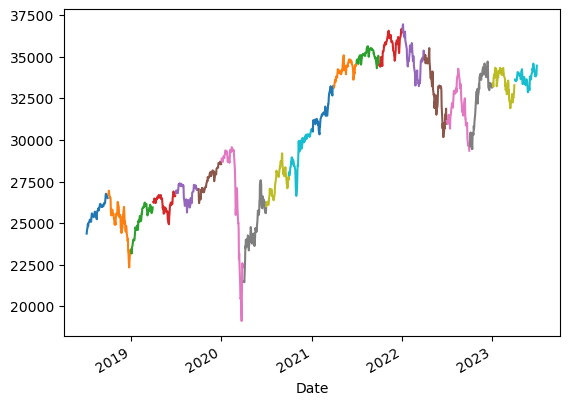

In [8]:
# Rule QS means Yearly quateryly
df_stooq.resample(rule='QS')['High'].plot()

<Axes: xlabel='Date'>

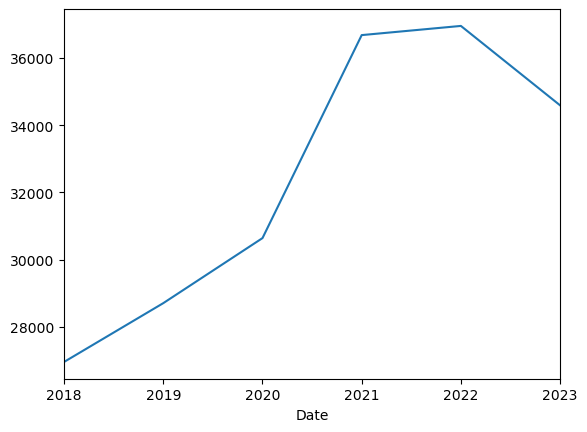

In [9]:
# Rule Business end frequency
df_stooq.resample(rule= 'BA').max()['High'].plot()

<Axes: xlabel='Date'>

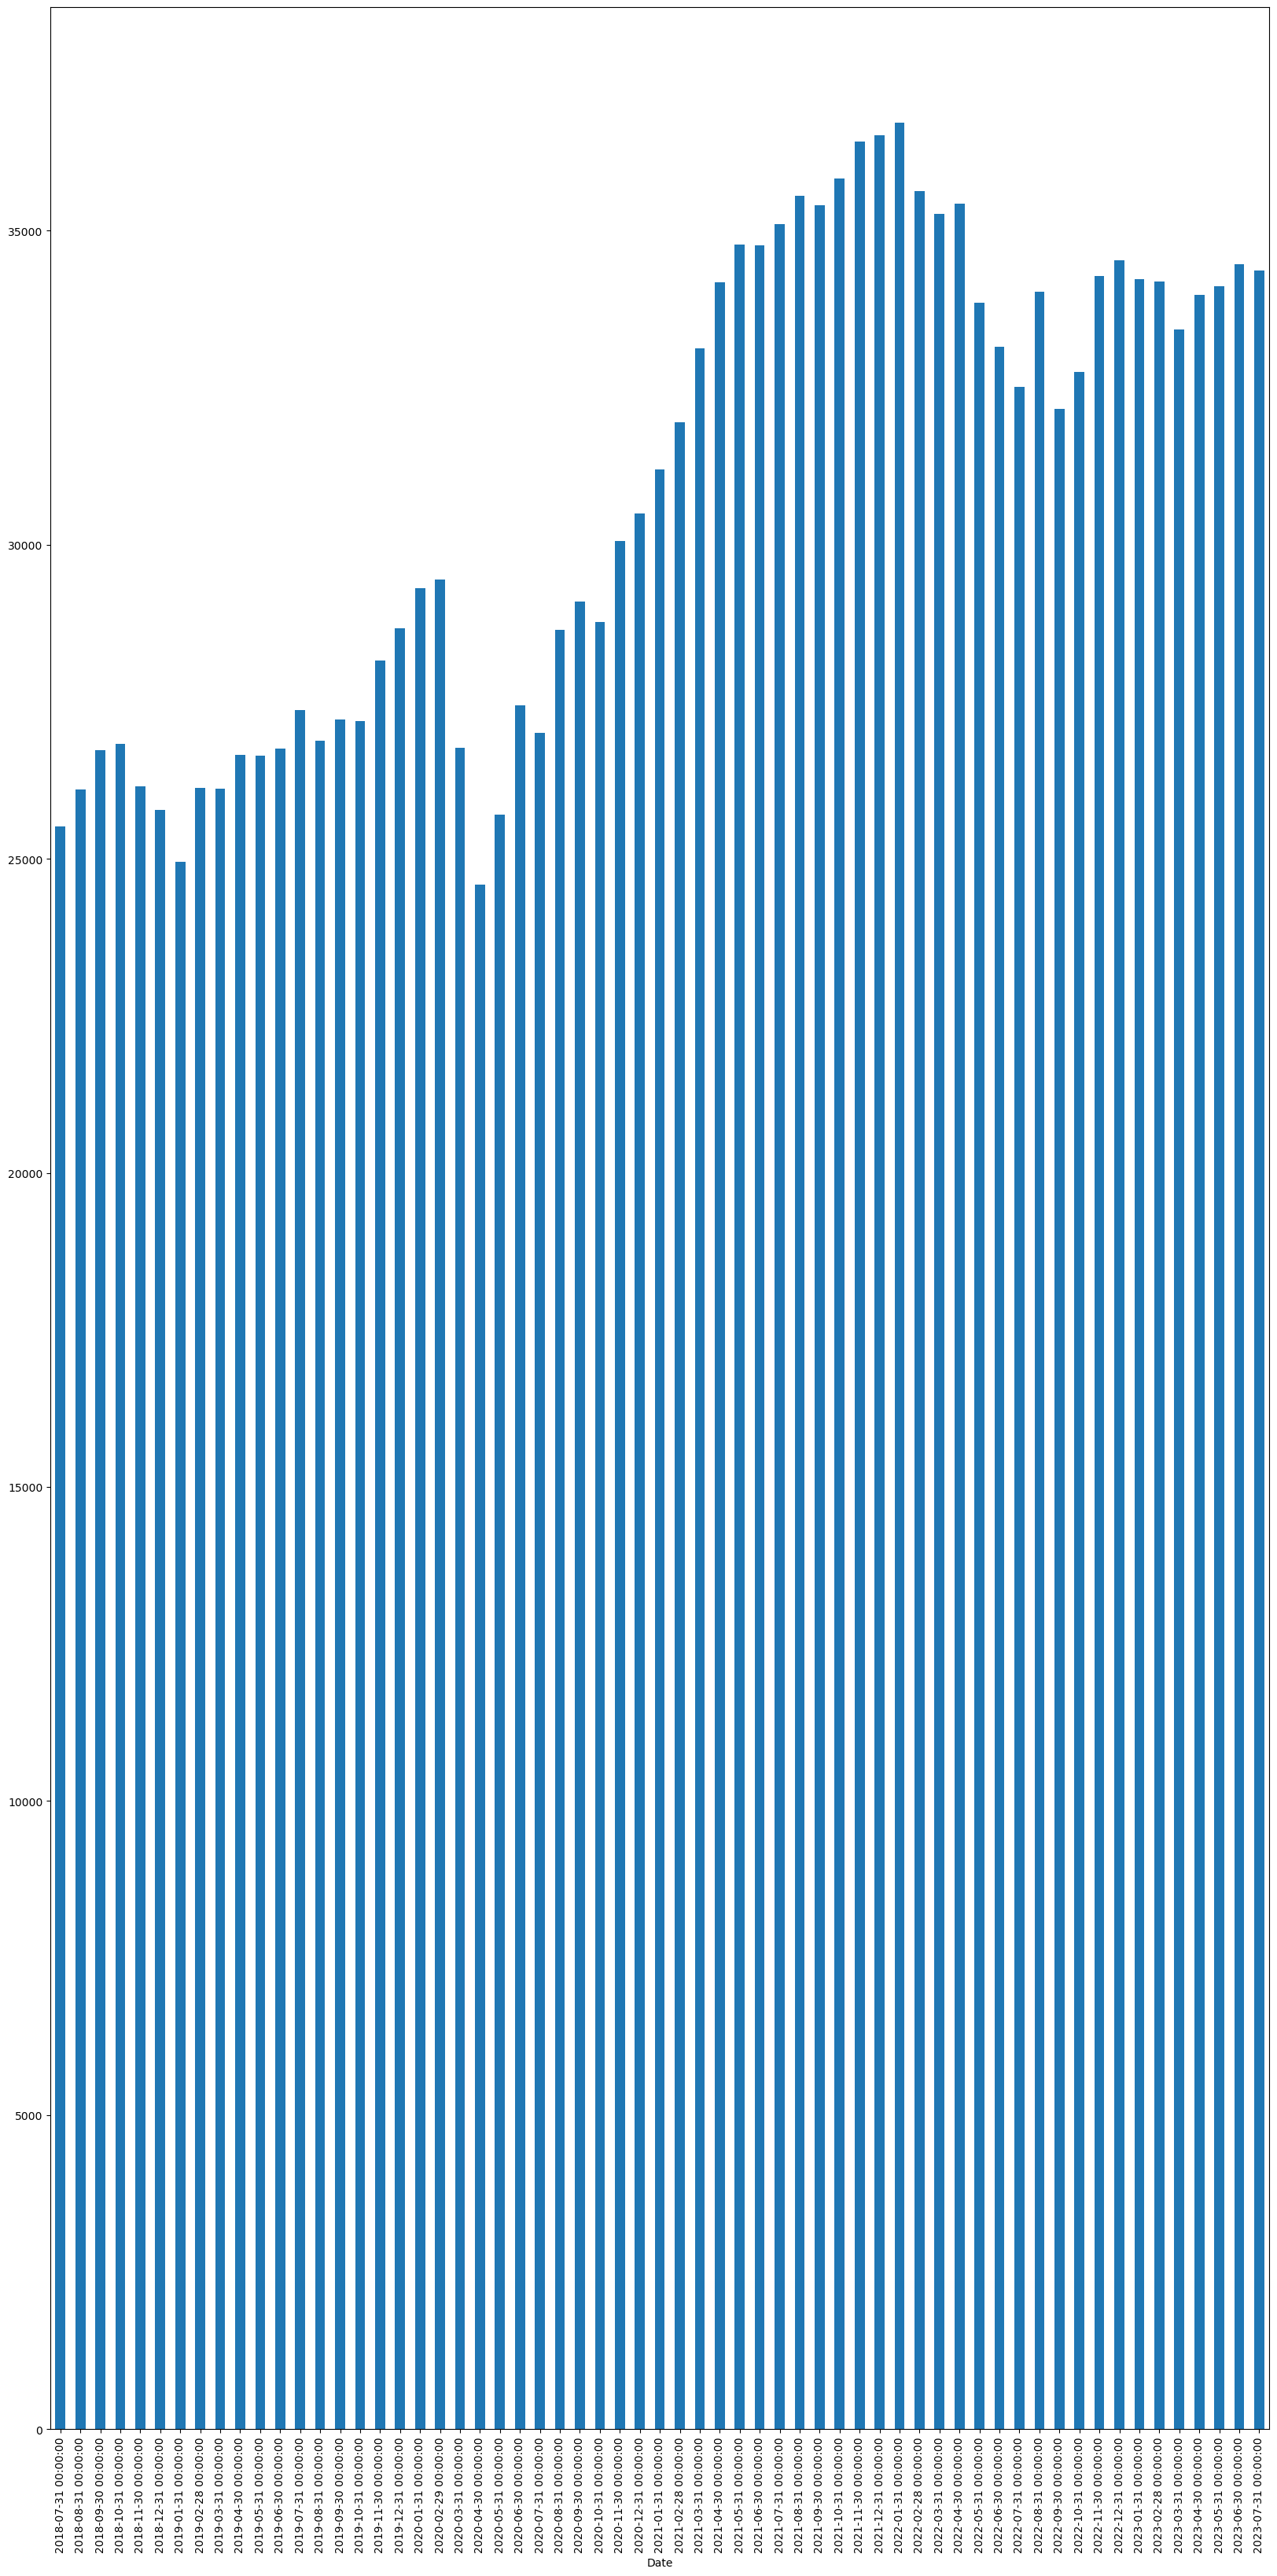

In [10]:
# Plotting bar on the colum
df_stooq['Open'].resample(rule='M').max().plot(kind='bar',figsize=(20,40))

<Axes: xlabel='Date'>

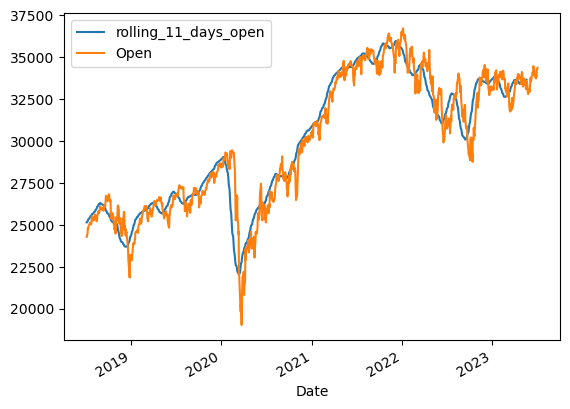

In [11]:
# Rolling, Expanding
# Rolling mean is used for smoothing
# Rolling mean is used for smoothing the curve
df_stooq['rolling_11_days_open'] = df_stooq['Open'].rolling(30).mean()
df_stooq[['rolling_11_days_open','Open']].plot()


<Axes: xlabel='Date'>

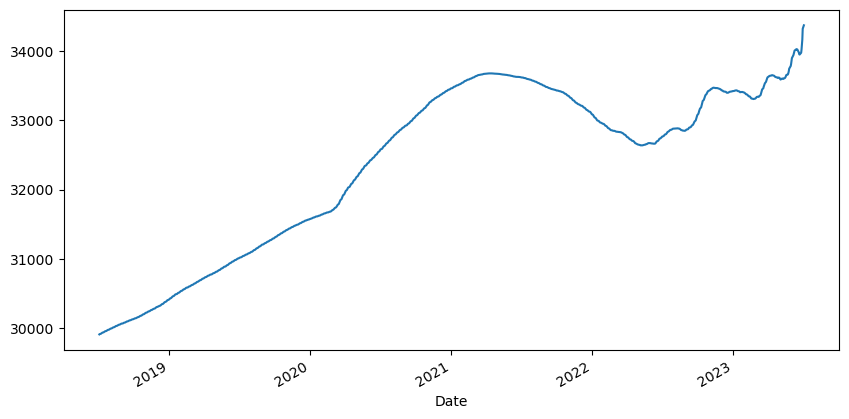

In [12]:
# Cummalative moving Average
df_stooq['Open'].expanding().mean().plot(figsize=(10,5))

<Axes: xlabel='Date'>

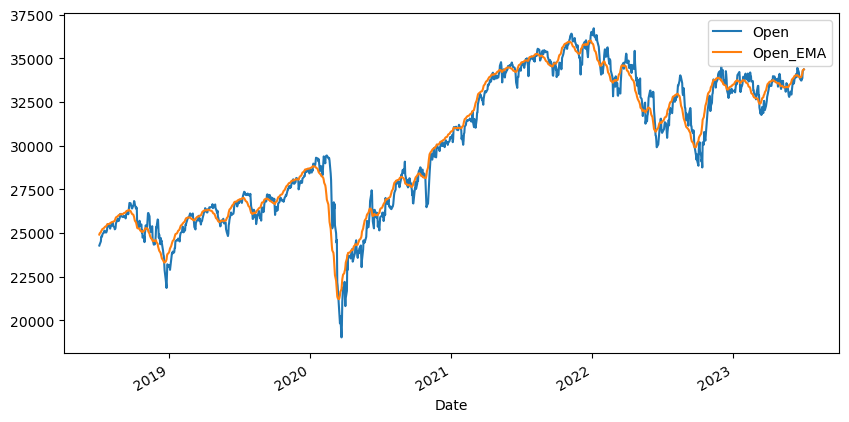

In [13]:
# Exponential Weighted Moving
# Formula : ( Close - PreviousEMA * Multiplier ) + PreviousEMA

df_stooq['Open_EMA'] = df_stooq['Open'].ewm(alpha=0.1).mean()
df_stooq[['Open','Open_EMA']].plot(figsize=(10,5))

<Axes: xlabel='Date'>

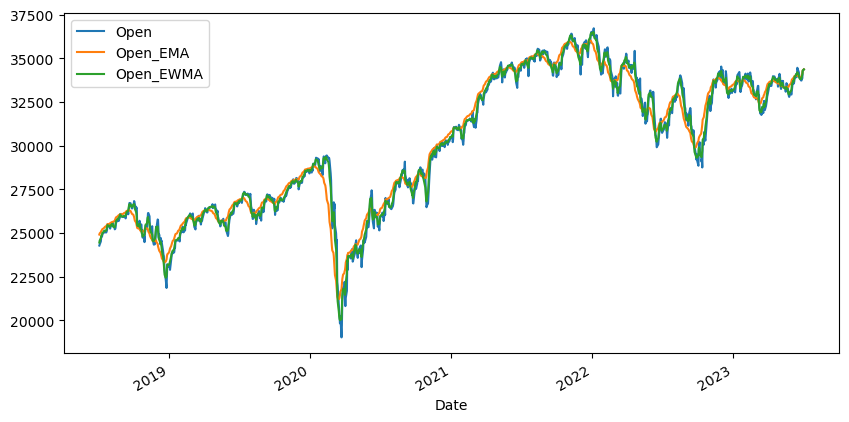

In [14]:
# Exponential Weighted Moving Average
df_stooq['Open_EWMA'] = df_stooq['Open'].ewm(span=4).mean()
df_stooq[['Open','Open_EMA','Open_EWMA']].plot(figsize=(10,5))

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sms
import statsmodels
import seaborn as sns
df_airline = pd.read_csv('airline_passengers.csv')

In [16]:
df_airline.head(10)

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
5,1949-06,135.0
6,1949-07,148.0
7,1949-08,148.0
8,1949-09,136.0
9,1949-10,119.0


In [17]:
df_airline.dropna(axis = 0, inplace=True)

In [24]:
df_airline.tail(10)

,Month,Thousands of Passengers
134,1960-03,419.0
135,1960-04,461.0
136,1960-05,472.0
137,1960-06,535.0
138,1960-07,622.0
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [25]:
df_airline['Month'] = pd.to_datetime(df_airline['Month'])

In [26]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [27]:
df_airline.set_index('Month',inplace =True)

<Axes: xlabel='Month'>

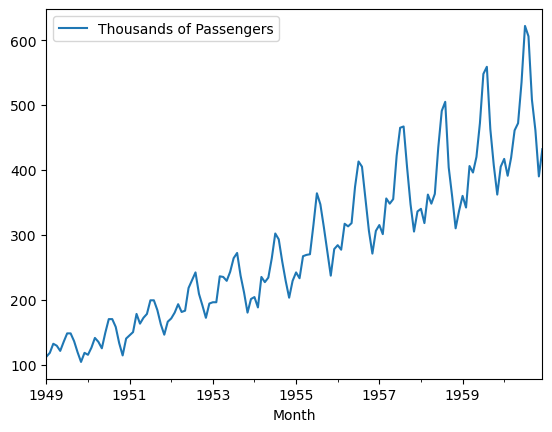

In [28]:
df_airline.plot()

In [48]:
from statsmodels.tsa.stattools import adfuller

In [52]:
def adf_test(series):
    result = adfuller(series)
    print("adf statisctics :{}".format(result[0]))
    print("pvalue:{}".format(result[1]))
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is not stationary")

In [53]:
adf_test(df_airline['Thousands of Passengers'])

adf statisctics :nan
pvalue:nan
Data is not stationary


In [18]:
#Date lines Index

In [19]:
#Time Resampling

In [20]:
#Time Shifts

In [21]:
#Mean Rolling and Expanding

In [22]:
#Time Series Visualization

In [23]:
#One Sample Project On Time Series